<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
csv_sac = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
# A: here i import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Settin the csv to be a readable pandas dataframe
sactown = pd.read_csv(csv_sac)
sactown.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

##### Notes : 
       REMEMBER TO BREATH and stay focused. 
       OK . lets do stuff. 
       
       1. change the negative square footage and price to be a positive
           itemized row at 703
       2. change the sale_date to be a datetime and a day
       3. zip code can be looked at as an object (no math involved)
       4. get_dummies on Baths and Bedrooms, or for zip and type.
       5. find correlations for (price) : zip, type, bath, bed, sale date.
       

In [4]:
# A: Here I explore the days!
# sactown['city'].value_counts()
sactown['beds'].unique()
sactown['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

In [5]:
#Checking for null values

sactown.isnull().sum()


street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
sactown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
sactown.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


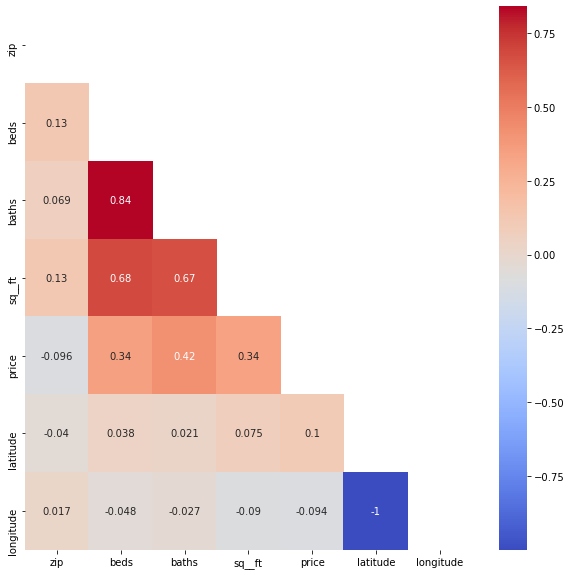

In [8]:
mask = np.zeros_like(sactown.corr())
mask[np.triu_indices_from(mask)] =True

plt.figure(figsize=(10,10))
sns.heatmap(
    sactown.corr(),
    cmap='coolwarm',
    annot = True,
    mask=mask
);

##### Notes : 
       REMEMBER TO BREATH and stay focused. 
       OK . lets do stuff. 
       
       1. change the negative square footage and price to be a positive
           itemized row at 703
       2. change the sale_date to be a datetime and a day
       3. zip code can be looked at as an object (no math involved)
       4. get_dummies on Baths and Bedrooms, or for zip and type.
       5. find correlations for (price) : zip, type, bath, bed, sale date.
       

In [9]:
#Here I am fixing the squarefoot and the price values of item#703
#I'm not gunna worry about state, longitute and latitude

newprice=[]
newsq_ft=[]
for i in range(len(sactown)):
    newprice.append(abs(sactown['price'][i]))
    newsq_ft.append(abs(sactown['sq__ft'][i]))

sactown['price']=newprice
sactown['sq__ft']=newsq_ft

In [10]:
sactown[703:704]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,984,Condo,Fri May 16 00:00:00 EDT 2008,210944,-121.503471,38.668433


In [11]:
#Here my goal is to fix the sale_date to be a date and day

sactown['sale_date']= pd.to_datetime(sactown['sale_date'])
sactown['sale_date'].dt.tz_localize(None)
sactown['day_of_week'] = sactown['sale_date'].dt.dayofweek


C:\Users\cmrjk\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [12]:
sactown

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day_of_week
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,2
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,2
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,2
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,2
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,38.457679,-121.359620,3
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,38.499893,-121.458890,3
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,38.708824,-121.256803,3
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,38.417000,-121.397424,3


##### Notes : 
       REMEMBER TO BREATH and stay focused. 
       OK . lets do stuff. 
       
       1. (GOTIT) change the negative square footage and price to be a positive
           itemized row at 703
       2. (COMPLETED)change the sale_date to be a datetime and a day
       3. zip code can be looked at as an object (no math involved)
       4. get_dummies on Baths and Bedrooms, or for zip and type.
       5. find correlations for (price) : zip, type, bath, bed, sale date.
       

In [13]:
sactown['zip'].dtype

dtype('int64')

https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/ 

In [14]:
zipdict = {'zip' : str}
sactown = sactown.astype(zipdict)

sactown.dtypes


street                 object
city                   object
zip                    object
state                  object
beds                    int64
baths                   int64
sq__ft                  int64
type                   object
sale_date      datetime64[ns]
price                   int64
latitude              float64
longitude             float64
day_of_week             int64
dtype: object

##### Notes : 
       REMEMBER TO BREATH and stay focused. 
       OK . lets do stuff. 
       
       1. (GOTIT) change the negative square footage and price to be a positive
           itemized row at 703
       2. (COMPLETED)change the sale_date to be a datetime and a day
       3. (Oh YEah done-zo) zip code can be looked at as an object
       4. get_dummies on Baths and Bedrooms, or for zip and type???
       5. find correlations for :
           (price) : city, zip, bed, bath, sq_ft, type, day
           
       6. ADDING THIS ONE IN! REMOVE ALL zeros from the squarefootage section. we not intersted! 
       (WHy are there so many zeros????????)
       

In [15]:
# We can do a get dummies when we make our Matric for Linear Regression

# Lets drop our unnessesary columns

sactown_clean = sactown.drop(['state', 'street','latitude','longitude'], axis = 1)


In [16]:
sactown_clean

,city,zip,beds,baths,sq__ft,type,sale_date,price,day_of_week
0,SACRAMENTO,95838,2,1,836,Residential,2008-05-21,59222,2
1,SACRAMENTO,95823,3,1,1167,Residential,2008-05-21,68212,2
2,SACRAMENTO,95815,2,1,796,Residential,2008-05-21,68880,2
3,SACRAMENTO,95815,2,1,852,Residential,2008-05-21,69307,2
4,SACRAMENTO,95824,2,1,797,Residential,2008-05-21,81900,2
...,...,...,...,...,...,...,...,...,...
980,SACRAMENTO,95829,4,3,2280,Residential,2008-05-15,232425,3
981,SACRAMENTO,95823,3,2,1477,Residential,2008-05-15,234000,3
982,CITRUS HEIGHTS,95610,3,2,1216,Residential,2008-05-15,235000,3
983,ELK GROVE,95758,4,2,1685,Residential,2008-05-15,235301,3


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

I think there may be some correlations between:

           (price) : city, zip, bed, bath, sq_ft, type, day

In [17]:
# A:


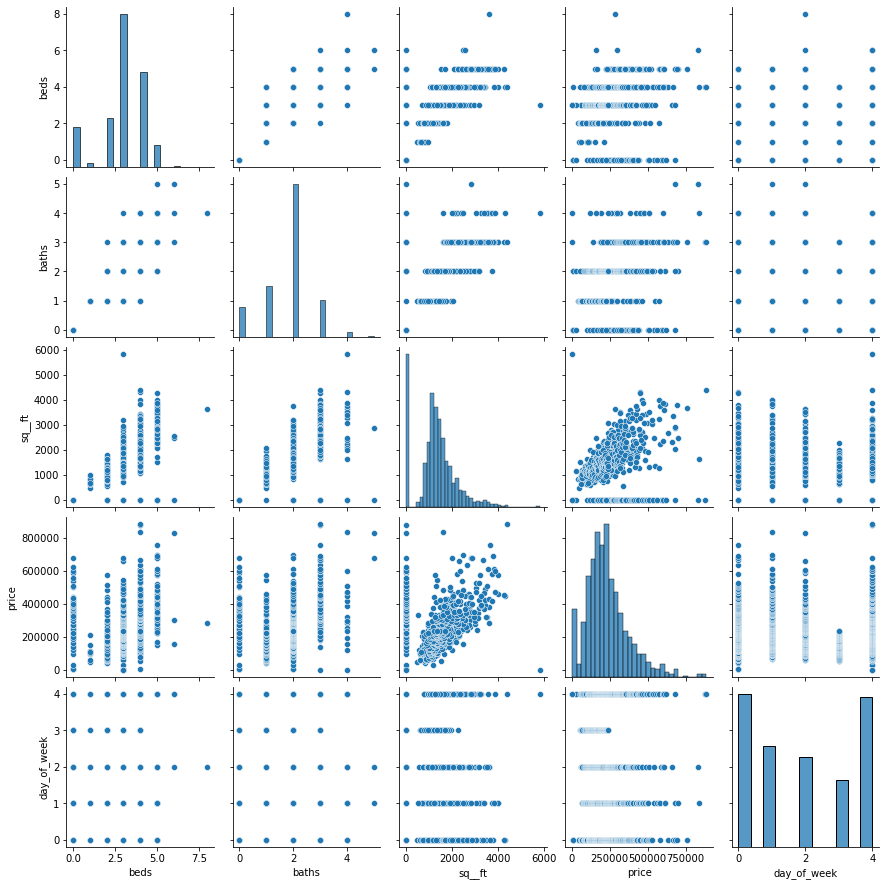

In [18]:
sns.pairplot(data=sactown_clean)


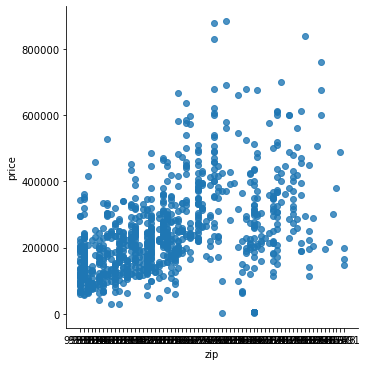

In [19]:
sns.lmplot(x='zip', y='price', data=sactown_clean, fit_reg=False, ci=False );


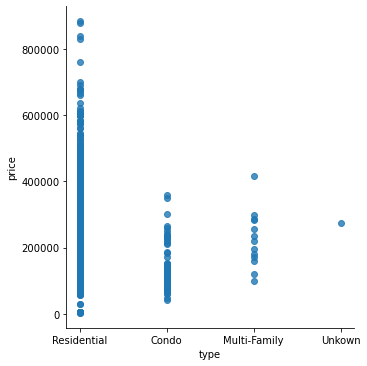

In [20]:
sns.lmplot(x='type', y='price', data=sactown_clean, fit_reg=False, ci=False );


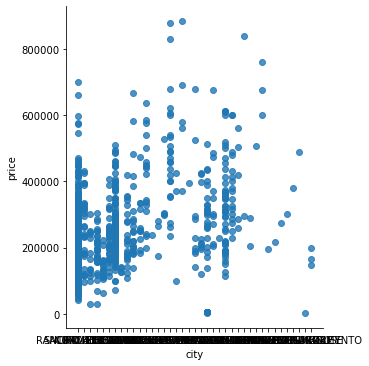

In [21]:
sns.lmplot(x='city', y='price', data=sactown_clean, fit_reg=False, ci=False );


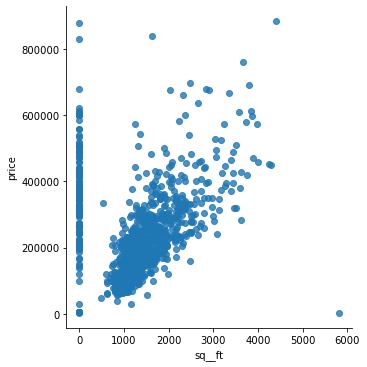

In [22]:
sns.lmplot(x='sq__ft', y='price', data=sactown_clean, fit_reg=False, ci=False );
#  This is our best bet i think! Look at that coorelation

In [23]:
count = 0
# here i am checking to see how many 0 vales there is for squarefootage. These must go! 
for i in range(len(sactown)):
    if sactown['sq__ft'][i] == 0:
        count += 1
print(count)

171


In [24]:
newindex =[]
for i in range(len(sactown_clean)):
    
    if sactown_clean['sq__ft'][i] > 0:
        
        newindex.append(i)
        
sactown_clean = sactown_clean.iloc[newindex] #Here i have removed all the zero values for sq__ft


In [25]:
sactown_clean = sactown_clean[(sactown_clean.sq__ft > 5000) == False]

# here i am removing a weird outliner of a huge squarefootage home with an unexplainably low price

sactown_clean.shape

(813, 9)

In [26]:
sactown_clean.reset_index(drop=True, inplace=True) #Reseting the index

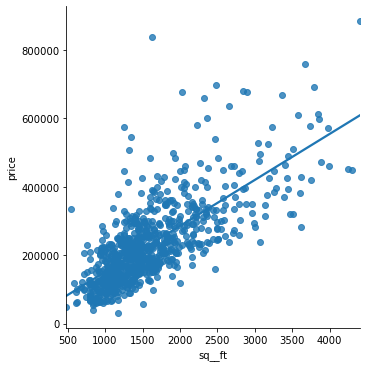

In [27]:
sns.lmplot(x='sq__ft', y='price', data=sactown_clean, fit_reg=True, ci=False );


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [28]:
sactown_clean.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

       Square footage because it has the best correlation on the graph vs price.

### 5. Build a function that takes in two lists, `Y` and `X`, as parameters and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

>_**Note:**_ You should **not** instantiate a linear regression model or implement any methods from `sklearn` to create this function. 

In [29]:
# https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
# This article was a godsend! And I gotta thank Kira for sharing it! SO AWESOME! 

# make a function takes our sqft and price
# minimize SSE
# find coefficients of line
#  y = mx+B slope and intercept formula

# scipi stats, using means sd, and minimize sse
# conda optimization


In [30]:
Xsac = sactown_clean['sq__ft']
ysac = sactown_clean['price']
print(Xsac.shape)
print(ysac.shape)

(813,)
(813,)


In [31]:
Xmean = Xsac.mean()
ymean = ysac.mean()

In [32]:
xblist = [] #This is simply Xactual - Xmeanvalue
yblist = [] #This is simply yactual - ymeanvalue
for i in range(len(Xsac)):
    xblist.append(Xsac[i]-Xmean)
    yblist.append(ysac[i]-ymean)
    
bnomlist = [] # This is the nominator in the beta calc
for xi, yi in zip(xblist, yblist):
    bnomlist.append(xi * yi)
    
bdenomlist = [i**2 for i in xblist] 
# denominator in beta calc

beta = sum(bnomlist) / sum(bdenomlist)
beta

134.64083993681086

In [33]:
alpha = ymean - beta * Xmean
alpha

16195.54559635208

In [34]:
# Now that we have alpha and beta we have a way to 
# calculate the estimated values of (y : price) from
# the (X : sq__ft). 

# This is our slope of a line equasion. 
# Yhat = alpha + beta * X

# we are too build a function that takes in y and x,
# and gives us the y-intecept and slope of this line.
# Well we already have slope in beta! thats good. 
# To find the y-intercept we must set x = 0. 

In [35]:
def interceptslopeSSE(ylist, xlist):
    ylistmean = ylist.mean()
    xlistmean = xlist.mean()
    
    xblist = [] #This is simply Xactual - Xmeanvalue
    yblist = [] #This is simply yactual - ymeanvalue
    for i in range(len(xlist)):
        xblist.append(xlist[i]-xlistmean)
        yblist.append(ylist[i]-ylistmean)
    
    bnomlist = [] #the nominator in the beta calc
    for xi, yi in zip(xblist, yblist):
        bnomlist.append(xi * yi)
    
    bdenomlist = [i**2 for i in xblist] 
    # denominator in beta calc

    beta = sum(bnomlist) / sum(bdenomlist)
    alpha = ylistmean - beta * xlistmean
    print(f'y-intercept : {alpha}')
    print(f'slope : {beta}' )

    

In [36]:
interceptslopeSSE(ysac, Xsac)

y-intercept : 16195.54559635208
slope : 134.64083993681086


### 6. Interpret the intercept. Interpret the slope.

In [37]:
# A: alpha is the intercept, beta is the slope. 
interceptslopeSSE(ysac, Xsac)

y-intercept : 16195.54559635208
slope : 134.64083993681086


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### A:
This model could be used to predict the price of a house if a house has a specific square footage. However it may be off be a little (we can't expect perfection because the data is imperfect). 

This model could be used to infer the expected price of a home we already have in our data and we can see how well the model matches up to our actual values. 

The big difference between infering and predicting is using data we have already versus data that we would have to conjur up from potential possibilities respectively. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [38]:
# A:


---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [39]:
# A:
typedummies = pd.get_dummies(sactown_clean['type'], drop_first=True)
sactown_clean = sactown_clean.join( typedummies)

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove the "Unkown" variable from the four variables in your dummy-coded  dataframe and add the remaining dummy-coded variables to the original dataframe.
> _**Note:**_ You may have already created the dummy columns on the original dataframe. If so, you can just leave them there, no problem, but still remove "Unkown".  
_**Hint:**_ You also may not see an "Unkown" dummy column. If you don't see it, identify in which step above you removed all "Unkown" observations.

A: I took out the zero squarefootage houses and the unkown was in there 

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [40]:
# A:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [41]:
# square feet, residential, and number of beds.)

X= sactown_clean[['sq__ft', 'Residential', 'beds']]

y= sactown_clean['price']

In [42]:
model.fit(X, y)

LinearRegression()

In [43]:
X.shape , y.shape

((813, 3), (813,))

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [44]:
model.predict(X);

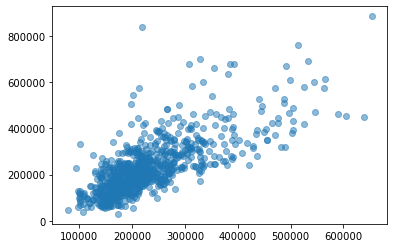

In [45]:
# A:
plt.scatter(model.predict(X), y, alpha=0.5)

Evaluation: The predicted price is not perfect with the true price. The relationship is good though in that it 
    follows the y=x line generally.

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [46]:
# #  A: LINE
# L: Linear function between the variables
# I: Independ variables
# N: Normally Distributed
# E: Equal Variances
# M: There Should be No Multicollinearity in the Data

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [47]:
# A: Linearly : They are linear because you can graph them linearly and they are related.
# Independent : The is no autocorrelation in tha data, where if you get more 
#               of a certian score it would change the other values. This is not the case. 

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [48]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

In [49]:
null_pred = y.mean()

In [50]:
null_resids = y- null_pred

In [51]:
null_sse = (null_resids**2).sum()
null_sse

11621394742474.387

In [52]:
preds=model.predict(X)

In [53]:
resids = y-preds

In [54]:
sse = (resids**2).sum()
sse

5222150901814.434

In [55]:
r2 = 1-sse / null_sse
r2

0.5506433592924707

In [56]:
model.score(X,y)

0.5506433592924707

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [57]:
# A:
def r2_adi(a, b):
    r2adj = 1-( ( 1 - model.score(a ,b) ) *(len(b) - 1) / (len(b) - len(a.columns) - 1))
    return r2adj

In [58]:
r2_adi(X, y)

0.5489770182268061

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [59]:
# A:
from sklearn.metrics import (explained_variance_score, mean_squared_error,
                             mean_squared_log_error, max_error, r2_score)

In [60]:
explained_variance_score(y , preds )

0.5506433592924707

In [61]:
mean_squared_error(y, preds)

6423309842.330176

In [62]:
mean_squared_error(y, preds, squared=False)

80145.55410208464

In [63]:
mean_squared_log_error(y, preds)

0.12052305569816772

In [64]:
max_error(y, preds)

620198.8972086345

In [65]:
r2_score(y, preds)

0.5506433592924707

In [66]:
def bigfuction(yval, predictions):
    print( 'explained_variance_score')
    print(explained_variance_score(yval , predictions )  )
    
    print('\nmean_squared_error')
    print(mean_squared_error(yval, predictions)  )
    
    print('\nmean_squared_error')
    print(mean_squared_error(yval, predictions, squared=False)  )
    
    print('\nmean_squared_log_error' )
    print( mean_squared_log_error(yval, predictions) )
    
    print('\nmax_error' )
    print(max_error(yval, predictions) )
    
    print('\nr2_score' )
    print(r2_score(yval, predictions) )

In [67]:
bigfuction(y, preds)

explained_variance_score
0.5506433592924707

mean_squared_error
6423309842.330176

mean_squared_error
80145.55410208464

mean_squared_log_error
0.12052305569816772

max_error
620198.8972086345

r2_score
0.5506433592924707


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [68]:
sactown_clean.columns

Index(['city', 'zip', 'beds', 'baths', 'sq__ft', 'type', 'sale_date', 'price',
       'day_of_week', 'Multi-Family', 'Residential'],
      dtype='object')

In [69]:
# A: EVALUATION: I think the max error is kinda shocking! I'm not 100% sure if it is as outragous
#     as i think it is but 62,000 off on.

X= sactown_clean[['sq__ft', 'Residential', 'beds', 'baths']] # added baths
y= sactown_clean['price']
model.fit(X, y)
preds=model.predict(X)
bigfuction(y, preds)

explained_variance_score
0.5512419453490024

mean_squared_error
6414753378.799677

mean_squared_error
80092.15553847753

mean_squared_log_error
0.12019854357405539

max_error
607779.947395643

r2_score
0.5512419453490023


Adding in baths has made a slight change in our r2 score and our explained variance score. 
It appears to have gone up slightly from .550 to .551. 

Our mean squared error has slightly decreased as well as the as the non-squared mean error
and our mean squared log error has also decresead. 

Our max error has decreased by 13,000 dollars yet it is still over 600,000.  


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [71]:
# A: I think for this model we may be close to the sweet spot, 
# even though the error is pretty far off. Based of the data we
# have and the methods we know, using beds baths and square feet 
# as well as breaking up the type we have likely found the best
# fir we can. That being said there may be methods that can account
# these variables in a smarter way that may take more values into
# account and give better results. 